# EDA for CompCars Data Set tabular data

In [ ]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pt= pd.read_excel("/Users/mertdil/Documents/DOD_background_data/data/part_table.xlsx")
pt.head()

,make_id,model_id,released_year,part_id,image_name,path
0,61,348,2014,7,8dc2acdddc7454.jpg,/Users/mertdil/Downloads/DOD_background_data/d...
1,61,348,2014,7,0d3dedf3e09429.jpg,/Users/mertdil/Downloads/DOD_background_data/d...
2,61,348,2014,6,3ed69717754dd5.jpg,/Users/mertdil/Downloads/DOD_background_data/d...
3,61,348,2014,6,7dfd89c9616719.jpg,/Users/mertdil/Downloads/DOD_background_data/d...
4,61,348,2014,1,3b83aed7bfc11f.jpg,/Users/mertdil/Downloads/DOD_background_data/d...


In [ ]:
an = pd.read_excel("/Users/mertdil/Documents/DOD_background_data/data/annotation.xlsx")
an.head()

,make_id,model_id,released_year,image_name,view,bbox_number,bbox_cor
0,135,947,2009,69ada64edf3ebb,4,1,40 103 769 525
1,135,947,2009,b00fef3e12bdf0,4,1,20 33 774 521
2,135,947,2009,60b5fa727f82f2,4,1,64 220 743 447
3,135,947,2009,13916301245610,4,1,67 69 744 464
4,135,947,2009,83ce148be0dcb5,4,1,301 254 657 446


In [ ]:
# Sütunların anlamlarını belirle
print("CompCars veri için hazırlanan part_table ve annatation tabloları Sütun anlamları:")
print("- make_id:  'make_names' hücre dizisi 'make_id'den make adlarına projeksiyonları sağlar, ")
print("- model_id: ve 'model_names' hücre dizisi 'model_id'den model adlarına projeksiyonları sağlar.")
print("- released_year: aracın piyasaya çıkış yılı")
print("- image_name: aracın resim dosyasının adı")
print("- view: resimde hangi açıdan çekildiği (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)")
print("- bbox_number: resimde kaç adet bounding box olduğu")
print("- bbox_cor: bounding box'ların koordinatları (the bounding box in the format 'x1 y1 x2 y2' in pixels, where 1 <= x1 < x2 <= image_width, and 1 <= y1 < y2 <= image_height)")
print("- part_id: aracın hangi parçası olduğu( 1 - headlight, 2 - taillight, 3 - fog light, 4 - air intake, 5 - console, 6 - steering wheel, 7 - dashboard, and 8 - gear lever.)")
print("- path: resim dosyasının yolu")

CompCars veri için hazırlanan part_table ve annatation tabloları Sütun anlamları:
- make_id:  'make_names' hücre dizisi 'make_id'den make adlarına projeksiyonları sağlar, 
- model_id: ve 'model_names' hücre dizisi 'model_id'den model adlarına projeksiyonları sağlar.
- released_year: aracın piyasaya çıkış yılı
- image_name: aracın resim dosyasının adı
- view: resimde hangi açıdan çekildiği (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)
- bbox_number: resimde kaç adet bounding box olduğu
- bbox_cor: bounding box'ların koordinatları (the bounding box in the format 'x1 y1 x2 y2' in pixels, where 1 <= x1 < x2 <= image_width, and 1 <= y1 < y2 <= image_height)
- part_id: aracın hangi parçası olduğu( 1 - headlight, 2 - taillight, 3 - fog light, 4 - air intake, 5 - console, 6 - steering wheel, 7 - dashboard, and 8 - gear lever.)
- path: resim dosyasının yolu


The most common viewpoint is 4
- view: resimde hangi açıdan çekildiği (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)


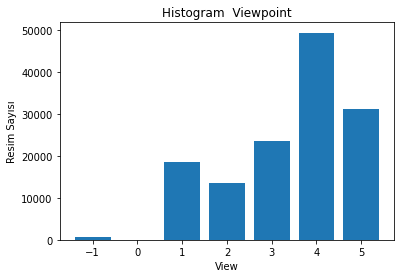

In [ ]:
# en sık kullanılan görünüm açısı
most_common_view = an['view'].mode()[0]
print(f'The most common viewpoint is {most_common_view}')
print("- view: (-1 - uncertain, 1 - front, 2 - rear, 3 - side, 4 - front-side, 5 - rear-side)")
# annotation tablosundaki verileri histogram olarak görselleştirme
part_count = an.groupby("view").size()
plt.bar(part_count.index, part_count.values)
plt.title("Histogram  Viewpoint")
plt.xlabel("View")
plt.ylabel("Resim Sayısı")
plt.show()


In [ ]:
# 'view' sütununda 'unknown' değerlerinin sayısını hesapla
num_unknown_views = an[an['view'] == -1].shape[0]

print("Annatation tablosunda toplam {} adet 'unknown' görünüm değeri var.".format(num_unknown_views))

Annatation tablosunda toplam 780 adet 'unknown' görünüm değeri var.


The most common part_id is 1


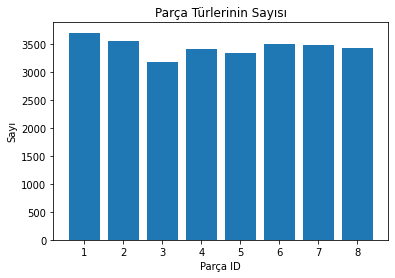

In [ ]:
# en sık kullanılan part id
most_common_view = pt['part_id'].mode()[0]
print(f'The most common part_id is {most_common_view}')
# 'part_id' sütunundaki parça türlerinin sayısını inceleyin
part_count = pt.groupby("part_id").size()
plt.bar(part_count.index, part_count.values)
plt.title("Parça Türlerinin Sayısı")
plt.xlabel("Parça ID")
plt.ylabel("Sayı")
plt.show()

Text(0.5, 1.0, 'Distribution of Headlights by Make and Model')

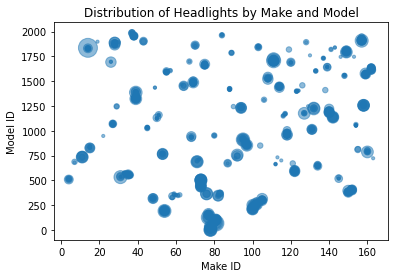

In [ ]:
# part_table'dan sütunları 'part_id', 'make_id', ve 'model_id' olan satırları seçme
part_models = pt[['part_id', 'make_id', 'model_id']]

# belirli bir parça türünün her araç modelinde kaç kez göründüğünü sayma
part_counts = part_models[part_models['part_id'] == 1].groupby(['make_id', 'model_id']).size().reset_index(name='count')

# sonuçları görselleştirme
part_counts.plot(kind='scatter', x='make_id', y='model_id', s=part_counts['count']*10, alpha=0.5)
plt.xlabel('Make ID')
plt.ylabel('Model ID')
plt.title('Distribution of Headlights by Make and Model')


Text(0.5, 1.0, 'Models with the Most Part Images')

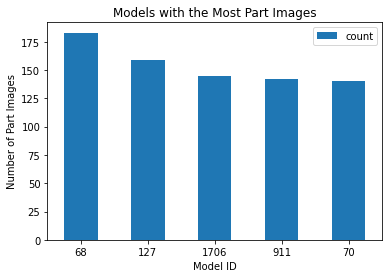

In [ ]:
# part_table'dan sütunları 'make_id' ve 'model_id' olan satırları seçme
part_models = pt[['make_id', 'model_id']]

# her araç modelinde kaç kez parça görüntüsü olduğunu sayma
part_counts = part_models.groupby(['make_id', 'model_id']).size().reset_index(name='count')

# en çok parça görüntüsüne sahip araç modellerini seçme
most_parts_models = part_counts.sort_values(by='count', ascending=False).head()

# sonuçları görselleştirme
most_parts_models.plot(kind='bar', x='model_id', y='count', rot=0)
plt.xlabel('Model ID')
plt.ylabel('Number of Part Images')
plt.title('Models with the Most Part Images')

Text(0, 0.5, 'Resim Sayısı')

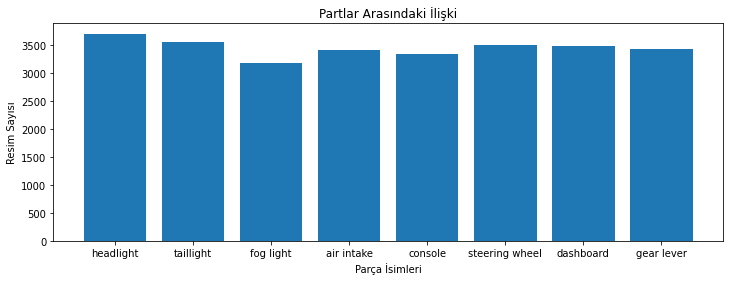

In [ ]:
# Partlar arasındaki ilişkiyi görselleştir
part_counts = part_data.groupby('part_id').count()['image_name'].reset_index()
part_names = {1:'headlight', 2:'taillight', 3:'fog light', 4:'air intake', 5:'console', 6:'steering wheel', 7:'dashboard', 8:'gear lever'}
part_counts['part_name'] = part_counts['part_id'].map(part_names)
f=plt.figure(figsize=(12,4)) 
plt.bar(part_counts['part_name'], part_counts['image_name'])
plt.title('Partlar Arasındaki İlişki')
plt.xlabel('Parça İsimleri')
plt.ylabel('Resim Sayısı')


In [ ]:
# Her bir arabanın bulunduğu parçaları hesapla
car_parts = pt.groupby(['make_id', 'model_id', 'released_year'])['part_id'].unique()

print(car_parts)

make_id  model_id  released_year
4        509       2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         510       2014             [7, 6, 1, 8, 4, 3, 2, 5]
         511       2014             [7, 6, 1, 8, 4, 3, 2, 5]
                                              ...           
162      1636      2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         1637      2014             [7, 6, 1, 8, 4, 3, 2, 5]
163      723       2013             [7, 6, 1, 8, 4, 3, 2, 5]
Name: part_id, Length: 1932, dtype: object


In [ ]:
# Her bir arabanın bulunduğu view hesapla
car_parts = an.groupby(['make_id', 'model_id', 'released_year'])['view'].unique()

print(car_parts)

make_id  model_id  released_year
1        1101      2011             [4, 1, 5, 2, 3]
         1102      2011                [5, 1, 4, 2]
                   2012                      [5, 4]
         1103      2011             [4, 5, 2, 1, 3]
                   2013                   [5, 1, 3]
                                         ...       
163      723       2013             [3, 4, 2, 1, 5]
         724       2010                [5, 3, 4, 1]
         725       2009             [4, 3, 2, 5, 1]
                   2010                      [4, 5]
                   2011             [4, 5, 3, 1, 2]
Name: view, Length: 4446, dtype: object


In [ ]:
# İki tabloyu birleştir
merged_df = pd.merge(pt, an, on=['make_id', 'model_id', 'released_year'])

# Birleştirilmiş tabloyu yazdır
print(merged_df.head())


   make_id  model_id released_year  part_id        image_name_x  \
0       61       348          2014        7  8dc2acdddc7454.jpg   
1       61       348          2014        7  8dc2acdddc7454.jpg   
2       61       348          2014        7  8dc2acdddc7454.jpg   
3       61       348          2014        7  8dc2acdddc7454.jpg   
4       61       348          2014        7  8dc2acdddc7454.jpg   

                                                path    image_name_y  view  \
0  /Users/mertdil/Downloads/DOD_background_data/d...  2d6b8c42368c3f     5   
1  /Users/mertdil/Downloads/DOD_background_data/d...  47cfe8f1c4a7e9     3   
2  /Users/mertdil/Downloads/DOD_background_data/d...  f89f2b130b71da     1   
3  /Users/mertdil/Downloads/DOD_background_data/d...  edd66b164b1c14     5   
4  /Users/mertdil/Downloads/DOD_background_data/d...  f13393d196e530     4   

   bbox_number         bbox_cor  
0            1   69 111 725 502  
1            1   35 194 754 500  
2            1  209 107 81

In [ ]:
# Her bir arabanın bulunduğu view hesapla
car_view = merged_df.groupby(['make_id', 'model_id', 'released_year'])['view'].unique()

print(car_view)

make_id  model_id  released_year
4        509       2012             [4, 3, 5, 2, 1]
                   2013             [4, 3, 5, 1, 2]
                   2014             [1, 4, 3, 5, 2]
         510       2014             [4, 5, 1, 3, 2]
         511       2014             [4, 1, 3, 2, 5]
                                         ...       
162      1636      2012             [2, 4, 3, 5, 1]
                   2013             [2, 5, 4, 1, 3]
                   2014             [5, 4, 1, 3, 2]
         1637      2014             [1, 2, 3, 5, 4]
163      723       2013             [3, 4, 2, 1, 5]
Name: view, Length: 1932, dtype: object


In [ ]:
# Her bir arabanın bulunduğu view hesapla
car_part = merged_df.groupby(['make_id', 'model_id', 'released_year'])['part_id'].unique()

print(car_part)

make_id  model_id  released_year
4        509       2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         510       2014             [7, 6, 1, 8, 4, 3, 2, 5]
         511       2014             [7, 6, 1, 8, 4, 3, 2, 5]
                                              ...           
162      1636      2012             [7, 6, 1, 8, 4, 3, 2, 5]
                   2013             [7, 6, 1, 8, 4, 3, 2, 5]
                   2014             [7, 6, 1, 8, 4, 3, 2, 5]
         1637      2014             [7, 6, 1, 8, 4, 3, 2, 5]
163      723       2013             [7, 6, 1, 8, 4, 3, 2, 5]
Name: part_id, Length: 1932, dtype: object


# Nesne Tesbiti için Yolo kütüphanesi (YOLO, Faster R-CNN, SSD ve Mask R-CNN )


YOLO
 YOLO (You Only Look Once), görüntü veya video üzerinde nesne algılama yapmak için kullanılan bir derin öğrenme modelidir. YOLO, tek bir ağın tamamını görüntüye veya videodaki tüm nesneleri tek seferde algılamak için eğitir. Bu nedenle, daha hızlı ve daha az hesaplama gücü gerektirir. Bu özellikleri nedeniyle, gerçek zamanlı nesne algılama için yaygın bir seçimdir.

YOLO, nesneleri algılarken bir çerçeve içindeki farklı konumları için ayrı ayrı tespit etmek yerine, çerçevenin tamamını tek seferde değerlendirir. Bu çerçeveye, bir önceden eğitilmiş model kullanarak belli bir boyuta dönüştürülür. Ardından, çerçevenin her bir bölgesinde bulunan nesnelerin olasılığını tahmin etmek için derin bir sinir ağı kullanılır.

YOLO, ilk olarak 2016 yılında Joseph Redmon tarafından geliştirildi ve "You Only Look Once: Unified, Real-Time Object Detection" başlıklı bir makalede yayınlandı. Daha sonra, modelin hız ve doğruluğunu artırmak için birkaç sürümü geliştirildi. Son olarak, 2021 yılında YOLOv5 modeli, daha hızlı ve daha hassas bir nesne algılama için çıkarıldı.

Örnek olarak, bir YOLO modeli kullanarak bir trafik kamerasından çekilen bir görüntüdeki araçları tespit edebilirsiniz. Model, görüntünün tamamını tek seferde işleyeceği için, tüm araçları aynı anda algılayacak ve çerçevenin her bir bölgesinde olası araçların konumlarını ve sınıflarını tahmin edecektir.

In [ ]:
import os

# Veri kümesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# Görüntü ve etiket klasörleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')



In [54]:
def open_image_and_label(make_id, model_id, year, image_name):
    """
    Belirtilen özelliklere sahip bir görüntü ve etiket dosyasını açar ve görüntü ve etiketi döndürür.
    """
    # Görüntü ve etiket dosyalarının yolu
    image_path = os.path.join(image_folder, f'{make_id}/{model_id}/{year}/{image_name}.jpg')
    label_path = os.path.join(label_folder, f'{make_id}/{model_id}/{year}/{image_name}.txt')

    # Görüntüyü aç
    image = Image.open(image_path)

    # Etiketi aç
    with open(label_path, 'r') as f:
        # Viewpoint
        viewpoint = int(f.readline().strip())

        # Bounding box sayısı
        num_bboxes = int(f.readline().strip())

        # Bounding box koordinatları
        bbox_coords = tuple(map(int, f.readline().strip().split()))

    return image, (viewpoint, num_bboxes, bbox_coords)


In [71]:
from PIL import Image

image, label = open_image_and_label(25,	1757,	2010,"cd25e66f5e8553")
image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")
image.show()



Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 567x800 1 car
Speed: 20.2ms pre-process, 177.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
Saved 1 image to runs/detect/exp4


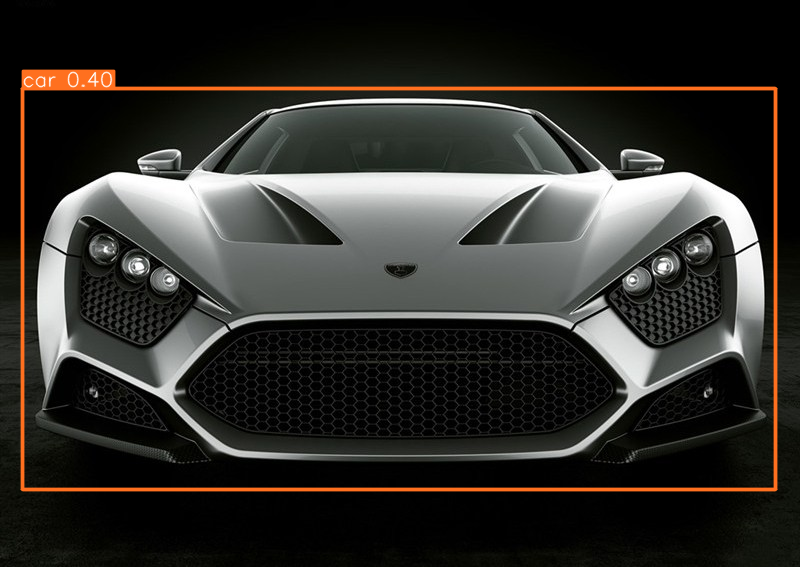

In [72]:

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Görüntüyü yükle


# Modeli kullanarak araçları tespit et
results = model(image)

# Sonuçları yazdır
results.print()
results.save("/Users/mertdil/Documents/DOD_background_data/data/after_object_detection.jpg")
results.show()

Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


image 1/1: 628x910 1 person, 3 cars, 3 potted plants
Speed: 12.0ms pre-process, 180.7ms inference, 2.1ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/exp3


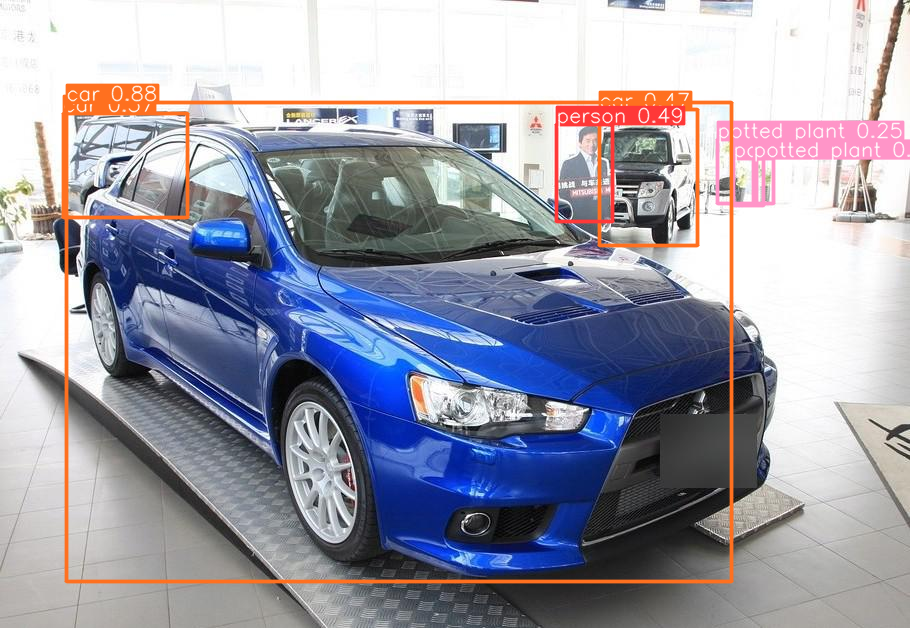

In [69]:
from PIL import Image

image, label = open_image_and_label(28,	1871,	2008,"eaeb5976848566")
image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")

import torch
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Görüntüyü yükle


# Modeli kullanarak araçları tespit et
results = model(image)

# Sonuçları yazdır
results.print()
results.save("/Users/mertdil/Documents/DOD_background_data/data/objectdetection.jpg")
results.show()

## Random Fotoğraflar üstünden nesne tesbiti


In [31]:
#####for döngüsü ile atama yapma
import os
from PIL import Image
import torch

# Veri kümesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# Görüntü ve etiket klasörleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# YOLOv5 modelini yükle
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Rastgele 10 görüntü için nesne tespiti yap
for i in range(10):
    # Rastgele görüntü seç
    make_id = str(np.random.randint(1, 101))
    model_id = str(np.random.randint(1, 5))
    year = str(np.random.randint(1990, 2022))
    image_names = os.listdir(os.path.join(image_folder, make_id, model_id, year))
    image_name = np.random.choice(image_names).split('.')[0]
    
    # Görüntü ve etiketi aç
    image, _ = open_image_and_label(make_id, model_id, year, image_name)
    
    # Modeli kullanarak araçları tespit et
    results = model(image)
    
    # Sonuçları yazdır
    print(f'Image {i+1}: {image_name}.jpg')
    results.print()


Using cache found in /Users/mertdil/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-17 Python-3.10.6 torch-2.0.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


requirements: /Users/mertdil/.cache/torch/hub/requirements.txt not found, check failed.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mertdil/Documents/DOD_background_data/data/image/18/3/1991'

#bu yöntemin başarızlığın nedeni model make idleri bir düzende ilerlemiyor

In [33]:
# Görüntü ve etiket klasörleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# Görüntü ve etiket dosyaları için özellikler
images = [
    (100, 209, 2015, '4'),
    (100, 210, 2012, '5'),
    (139, 1643, 2013, '1'),
]

# Görüntüleri ve etiketleri aç ve araçları tespit et
for make_id, model_id, year, image_name in images:
    # Görüntüyü ve etiketi aç
    image, label = open_image_and_label(make_id, model_id, year, image_name)

    # Görüntüyü YOLOv5 modeli için uygun hale getir
    img = model.preprocess(image)

    # Modeli kullanarak araçları tespit et
    results = model.forward(img, size=image.size)

    # Sonuçları yazdır
    results.print()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mertdil/Documents/DOD_background_data/data/image/100/209/2015/4.jpg'

#pip install torch torchvision torchaudio

#pip install opencv-python


# Görüntü Segmentasyonu Aşamaları


 R-CNN bilgi
 R-CNN (Region-based Convolutional Neural Network) modeli, nesne tespiti için kullanılan derin öğrenme modellerinden biridir. 2014 yılında Ross Girshick ve arkadaşları tarafından yayınlanmıştır.

R-CNN modeli, nesne tespiti için üç aşamalı bir metodoloji kullanır. İlk aşamada, giriş görüntüsü bölümlere ayrılır ve her bir bölge, özellik haritalarını oluşturmak için önceden eğitilmiş bir evrişimli sinir ağı (Convolutional Neural Network - CNN) kullanılarak özellik vektörüne dönüştürülür. Bu işlem, görüntüdeki potansiyel nesnelerin tespit edilmesini sağlar.

İkinci aşamada, her bir bölge, özellik vektörleri ile birlikte, aynı nesne sınıfına ait örneklerin bulunduğu bir veri kümesi üzerinde eğitilmiş bir destek vektör makineleri (Support Vector Machines - SVM) sınıflandırıcısı kullanılarak sınıflandırılır. Bu işlem, bölgede bulunan nesnenin hangi sınıfa ait olduğunu belirler.

Üçüncü ve son aşamada, bölgenin içindeki nesnenin sınırlayıcı kutusu (bounding box) çıkarılır. Bu kutu, nesnenin konumunu ve boyutunu belirler. Bu kutunun doğruluğu, regresyon algoritmaları kullanılarak iyileştirilebilir.

Örnek olarak, R-CNN modeli kullanılarak yapılabilen bir uygulama, araçların tespit edilmesidir. Bu uygulamada, öncelikle giriş görüntüsü bölümlere ayrılır ve her bir bölge, özellik haritaları oluşturmak için önceden eğitilmiş bir CNN kullanılarak özellik vektörüne dönüştürülür. Daha sonra, SVM sınıflandırıcısı kullanılarak her bir bölge, araç veya araç olmayan sınıflarından birine ayrılır. Son olarak, araçların konumları belirlenir ve görüntüdeki her bir araç için sınırlayıcı kutular çıkarılır.

## R-CNN modeli kurma ve çalıştırma

### R-CNN model çalışma_1

In [34]:

import torchvision
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /Users/mertdil/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:15<00:00, 11.6MB/s] 


In [35]:
import torch
import torchvision.transforms as T
from PIL import Image

# Görüntüyü yükle
#image = Image.open("image.jpg")

# Dönüştürmeleri tanımla
transform = T.Compose([
    T.ToTensor()
])

# Görüntüyü tensöre dönüştür
image_tensor = transform(image)

# Modeli kullanarak nesne tespiti ve segmentasyon yap
model.eval()
with torch.no_grad():
    prediction = model([image_tensor])[0]

# Sonuçları yazdır
print(prediction.keys())



dict_keys(['boxes', 'labels', 'scores', 'masks'])


### R-CNN modeli üstüne çalışma_2

In [41]:
from PIL import Image
import torchvision.transforms as T

# Görüntüyü yükle
#image = Image.open('image.jpg')

# Görüntüyü dönüştür
transform = T.Compose([T.ToTensor()])
image = transform(image)


In [42]:
model.eval()

# Giriş görüntüsü üzerinde tahmin yap
predictions = model([image])

# Sınıflandırma ve sınırlayıcı kutuları ayıkla
scores = predictions[0]['scores'].detach().numpy()
boxes = predictions[0]['boxes'].detach().numpy()

# Maske tahminlerini ayıkla
masks = predictions[0]['masks'].detach().numpy()

# Kesilmiş görüntüleri al
masked_images = []
for i in range(len(scores)):
    if scores[i] > 0.5:
        mask = masks[i, 0]
        masked_image = image.permute(1, 2, 0).detach().numpy() * mask[..., np.newaxis]
        masked_images.append(masked_image)

# Maske tahminlerini görselleştir
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=len(masked_images), figsize=(10, 10))

for i in range(len(masked_images)):
    ax[i].imshow(masked_images[i])


### R-CNN model çalışma_3 (tek bir görüntüde başarı elde edildi.)

In [73]:
import torch
import torchvision
import os
from PIL import Image
import numpy as np

# Veri kümesi konumu
dataset_path = '/Users/mertdil/Documents/DOD_background_data/data'

# Görüntü ve etiket klasörleri
image_folder = os.path.join(dataset_path, 'image')
label_folder = os.path.join(dataset_path, 'label')

# Mask R-CNN modelini yükle
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Modeli değerlendirmeye ayarla
model.eval()

# Görüntüyü yükle
#image_path = os.path.join(image_folder, f'{make_id}/{model_id}/{year}/{image_name}.jpg')
#image = Image.open(image_path)

image, label = open_image_and_label(25,	1757,	2010,"cd25e66f5e8553")
#image.save("/Users/mertdil/Documents/DOD_background_data/data/image.jpg")

# Önceden eğitilmiş modeli kullanarak segmentasyon yap
with torch.no_grad():
    prediction = model([torchvision.transforms.functional.to_tensor(image)])

# Sonuçları yazdır
print(prediction)

# Segmentasyon haritasını alma
mask = prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy()

# Segmentasyon haritasını PIL görüntüsüne dönüştürme
mask_image = Image.fromarray(mask)

# Segmentasyon haritasını kaydetme
mask_image.save("/Users/mertdil/Documents/DOD_background_data/data/datasegmentation_mask.jpg")
mask_image.show()


[{'boxes': tensor([[ 19.70544,  99.86528, 792.30194, 475.45605],
        [ 41.04229, 156.06412, 764.30157, 458.82254],
        [143.62669, 319.05301, 632.98273, 443.04199],
        [  0.00000, 392.01141, 790.04895, 557.92065],
        [167.05870, 310.25391, 604.56989, 445.35974]]), 'labels': tensor([ 3, 77, 76, 67, 77]), 'scores': tensor([0.95199, 0.61133, 0.18812, 0.05592, 0.05514]), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 

# ResNET ve GAN Modeli Kurulumu



 Veri seti oluşturduktan sonra, ResNet ve GAN modellerini kurabilirsiniz. ResNet modeli, görüntüyü ön işleme yapmak için kullanılabilir. GAN modeli ise, arka plan değiştirme işlemini gerçekleştirmek için kullanılabilir.

